In [1]:
import tensorflow
import matplotlib.pyplot as plt
import numpy

In [2]:
#variables

BATCH_size=32
IMAGE_Size=256
EPOCHS=10
layer=tensorflow.keras.layers


In [3]:
model_type="strawberry"
dataset = tensorflow.keras.preprocessing.image_dataset_from_directory(f"Data/{model_type}", 
                                                                   batch_size=BATCH_size,
                                                                   image_size=(IMAGE_Size, IMAGE_Size),
                                                                   shuffle=True)
class_names=dataset.class_names

Found 1565 files belonging to 2 classes.


In [ ]:
model_type="data"
dataset = tensorflow.keras.preprocessing.image_dataset_from_directory(f"{model_type}", 
                                                                   batch_size=BATCH_size,
                                                                   image_size=(IMAGE_Size, IMAGE_Size),
                                                                   shuffle=True)
class_names=dataset.class_names
print(class_names)

In [52]:
plt.figure(figsize=(10,10))
for image_batch,lable_batch in dataset.take(1):
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(dataset.class_names[lable_batch[i]])
        plt.axis("off")

In [53]:
def get_splite_data(ds,train_size=0.8,valid_size=0.1,test_size=0.1, shuffle=True,shuffle_size=10000):
    if train_size+valid_size+test_size !=1:
        print("Incorrect")
        return None
    else:
        ds_size=len(ds)
        if shuffle:
            ds=ds.shuffle(shuffle_size,seed=12)
        train_size=int(train_size*ds_size)
        valid_size=int(valid_size*ds_size)
        test_size=int(test_size*ds_size)
        train_ds=ds.take(train_size)
        valid_ds=ds.skip(train_size).take(valid_size)
        test_ds=ds.skip(train_size+valid_size)
        return train_ds,valid_ds,test_ds

In [54]:
train_ds,valid_ds,test_ds=get_splite_data(dataset)

In [55]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tensorflow.data.AUTOTUNE)
valid_ds=valid_ds.cache().shuffle(1000).prefetch(buffer_size=tensorflow.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tensorflow.data.AUTOTUNE)

In [56]:
resize_and_rescale=tensorflow.keras.Sequential(
    [
        layer.experimental.preprocessing.Resizing(IMAGE_Size,IMAGE_Size),
        layer.experimental.preprocessing.Rescaling(1.0/255)
    ]
)
data_augmentation=tensorflow.keras.Sequential(
    [
        layer.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layer.experimental.preprocessing.RandomContrast(0.5),
        
    ]
)

In [57]:
model=tensorflow.keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layer.Conv2D(32,(3,3),activation="relu" , input_shape=(BATCH_size,IMAGE_Size,IMAGE_Size,3)),
    layer.MaxPool2D((2,2)),
    layer.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layer.MaxPool2D((2,2)),
    layer.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layer.MaxPool2D((2,2)),
    layer.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layer.MaxPool2D((2,2)),
    layer.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layer.MaxPool2D((2,2)),
    layer.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layer.MaxPool2D((2,2)),
    layer.Flatten(),
    layer.Dense(64,activation="relu"),
    layer.Dense(len(class_names),activation="softmax")
])
model.build(input_shape=(BATCH_size,IMAGE_Size,IMAGE_Size,3))

In [58]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_10 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_18 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                               

In [59]:
model.compile(
    optimizer="adam",
    loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [60]:
history = model.fit(
    train_ds, epochs=EPOCHS, batch_size=BATCH_size, verbose=1, validation_data=valid_ds
)

Epoch 1/10


39/39 [==============================] - 102s 2s/step - loss: 0.6076 - accuracy: 0.6924 - val_loss: 0.4051 - val_accuracy: 0.7266
Epoch 2/10
39/39 [==============================] - 94s 2s/step - loss: 0.3463 - accuracy: 0.8699 - val_loss: 0.1511 - val_accuracy: 0.9688
Epoch 3/10
39/39 [==============================] - 94s 2s/step - loss: 0.1248 - accuracy: 0.9526 - val_loss: 0.0335 - val_accuracy: 0.9922
Epoch 4/10
39/39 [==============================] - 94s 2s/step - loss: 0.0495 - accuracy: 0.9799 - val_loss: 0.0556 - val_accuracy: 0.9766
Epoch 5/10
39/39 [==============================] - 93s 2s/step - loss: 0.0377 - accuracy: 0.9871 - val_loss: 0.0247 - val_accuracy: 0.9922
Epoch 6/10
39/39 [==============================] - 92s 2s/step - loss: 0.0624 - accuracy: 0.9783 - val_loss: 0.1631 - val_accuracy: 0.9531
Epoch 7/10
39/39 [==============================] - 93s 2s/step - loss: 0.1044 - accuracy: 0.9759 - val_loss: 0.0674 - val_accuracy: 0.9766
Epoch 8/10
39/39 [============

In [61]:
model.evaluate(test_ds)

6/6 [==============================] - 4s 458ms/step - loss: 7.1198e-06 - accuracy: 1.0000


[7.119804649846628e-06, 1.0]

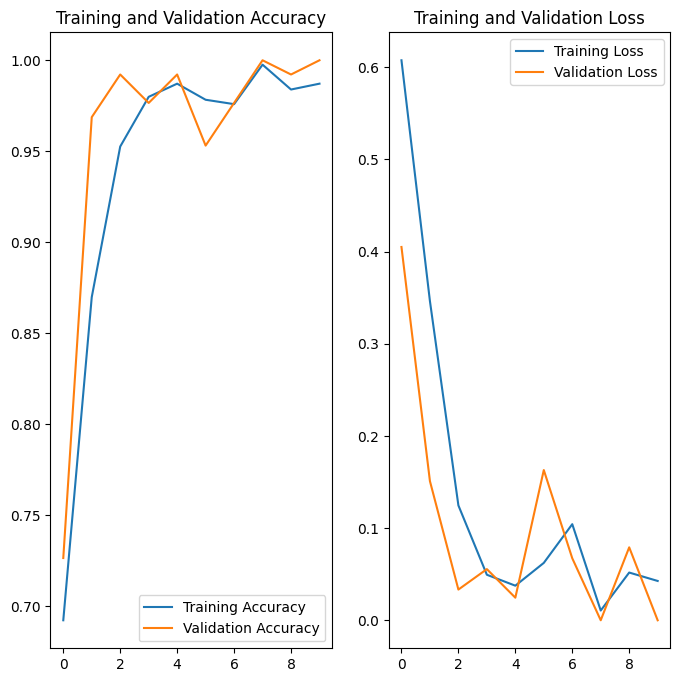

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Strawberry___healthy
1/1 [==============================] - 1s 626ms/step
predicted label: Strawberry___healthy


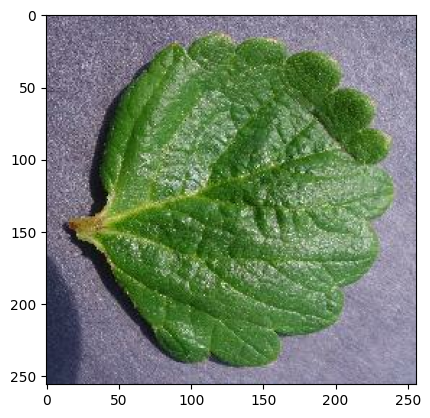

In [63]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[numpy.argmax(batch_prediction[0])])

In [1]:
def predict(model, img):
    img_array = tensorflow.keras.preprocessing.image.img_to_array(img)
    img_array = tensorflow.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[numpy.argmax(predictions[0])]
    confidence = round(100 * (numpy.max(predictions[0])), 2)
    return predicted_class, confidence 

1/1 [==============================] - 0s 40ms/step


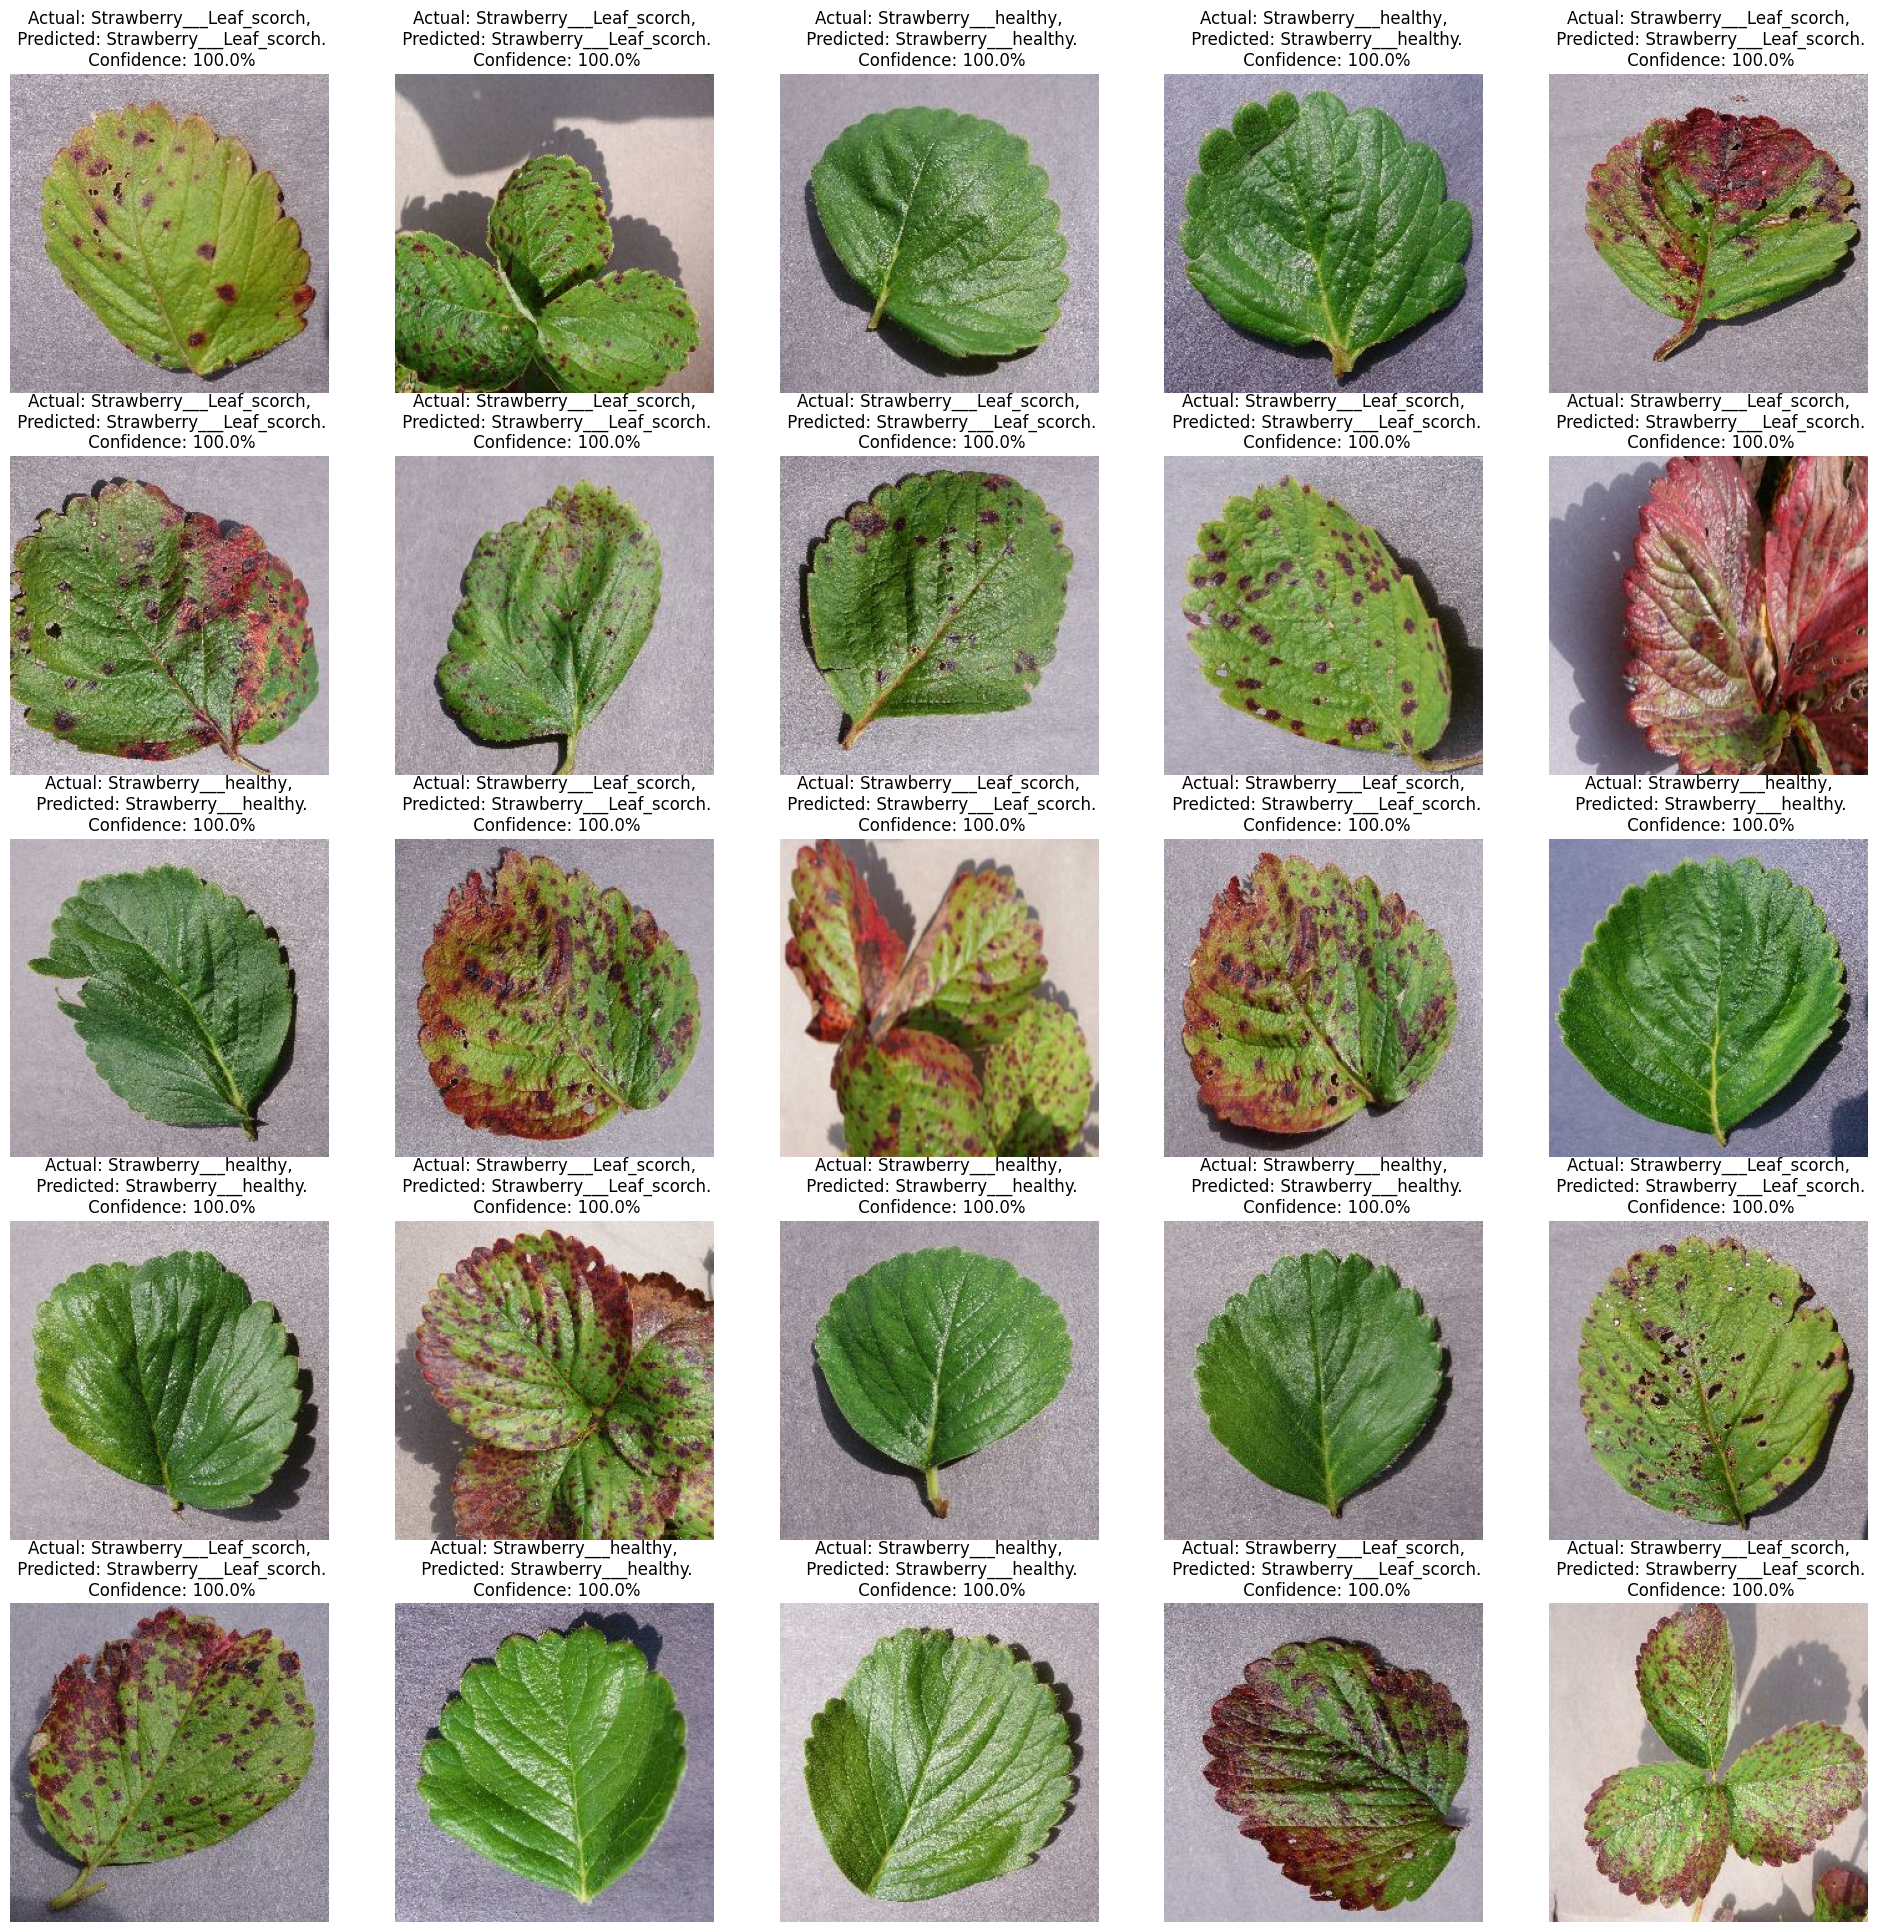

In [65]:
plt.figure(figsize=(24, 24))
for images, labels in test_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [66]:
import os
model.save(f"models/{model_type}")

INFO:tensorflow:Assets written to: models/strawberry\assets


INFO:tensorflow:Assets written to: models/strawberry\assets


In [20]:
MODEL = tensorflow.keras.models.load_model("models/apple")
from io import BytesIO
import numpy as np
from PIL import Image
with open("Data/apple/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG","rb") as f:
    Ima=f.read()
image = np.array(Image.open(BytesIO(Ima)))
predictions=MODEL.predict(np.expand_dims(image, 0))
predictions[0][np.argmax(predictions[0])]

1/1 [==============================] - 0s 192ms/step


0.9804569